In [ ]:
pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 28.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
pip install catboost imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [146]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import precision_score, recall_score


In [3]:
df = pd.read_csv('/content/ds_assignment_data.csv')
# df = pd.read_csv('/content/drive/MyDrive/ds_assignment_data.zip (Unzipped Files)/ds_assignment_data.csv')
df.head()

,int_date,demog_capitationcoefficient,demog_customer_age,smoking_is_smoker,smoking_smoking_years,smoking_total_heavy_smokers,lab_b_hcg_abs_last_value,lab_NT_MoM_last_value,lab_weight_at_lab_time_last_value,lab_num_of_fetuses_last_value,...,secondary_hypertension_sum,essential_hypertension_sum,hypertensive_heart_disease_sum,hypertensive_chronic_kidney_disease_sum,hypertensive_heart_and_chronic_kidney_disease_sum,pregnancy_hypertension_sum,preeclampsia_sum,eclampsia_sum,labs_sum,clinical_sheet
0,24163,0.73,33.0,0.0,0.00,0.0,44.9,1.01,90.0,1.0,...,0,0,0,0,0,0,0,0,0,שבוע 8\n\nתלונות: המטופלת מתלוננת על בחילות בב...
1,51373,0.79,34.0,1.0,1.86,0.0,31.6,0.80,58.0,1.0,...,0,0,0,0,0,0,0,0,0,שבוע 8 להיריון\n\nתלונות: המטופלת מתלוננת על ב...
2,74056,0.79,35.0,2.0,8.92,0.0,21.6,0.75,60.0,1.0,...,0,0,0,0,0,0,0,0,0,שבוע 8 להריון\n\nתלונות: המטופלת מתארת בחילות ...
3,57131,0.74,25.0,0.0,0.00,0.0,108.3,0.85,45.0,1.0,...,0,0,0,0,0,0,0,0,0,שבוע 8 להריון\n\nתלונות: \nהמטופלת בת 28 מגיעה...
4,89933,0.79,35.0,0.0,0.00,0.0,20.1,1.32,72.0,1.0,...,0,0,0,0,0,0,0,0,0,שבוע 8 להריון\n\nתלונות: המטופלת מדווחת על תחו...


In [4]:
df.nunique()[df.nunique() == 1]

,0
lab_num_of_fetuses_last_value,1
4_diag_90_days_since_last_diag,1
4_diag_106_days_since_last_diag,1
4_diag_126_days_since_last_diag,1
4_diag_136_days_since_last_diag,1
match_measure_after,1
secondary_hypertension_sum,1
hypertensive_heart_disease_sum,1
hypertensive_chronic_kidney_disease_sum,1
hypertensive_heart_and_chronic_kidney_disease_sum,1


#Exploratory Data Analysis

##Historical Diagnosis columns renaming

In [5]:
# consecutive columns pairs belong to the same ICD diagnosis code (based on tests ive done)
# I want to change the column names to make them more explainable and readable

def check_column_pairs(df):
    results = []
    col_names = df.columns.tolist()

    # Iterate over column indices in steps of 2
    for i in range(54, 88, 2):
        col1 = col_names[i]
        col2 = col_names[i + 1]

        non_zero_count = (df[col1] != 0).sum()
        non_null_count = df[col2].notnull().sum()

        is_equal = non_zero_count == non_null_count
        results.append((col1, col2, non_zero_count, non_null_count, is_equal))

    for i in range(89, 140, 2):
        col1 = col_names[i]
        col2 = col_names[i + 1]

        non_zero_count = (df[col1] != 0).sum()
        non_null_count = df[col2].notnull().sum()

        is_equal = non_zero_count == non_null_count
        results.append((col1, col2, non_zero_count, non_null_count, is_equal))

    # Convert results to DataFrame for better readability
    result_df = pd.DataFrame(results, columns=['Column1', 'Column2', 'NonZero_Count_Col1', 'NonNull_Count_Col2', 'Match'])
    return result_df

In [6]:
# we can see #non zero value in a column = #non null values in the following column
df_pairs = check_column_pairs(df)
df_pairs

,Column1,Column2,NonZero_Count_Col1,NonNull_Count_Col2,Match
0,24_diag_54_num_of_diag,24_diag_55_days_since_last_diag,917,917,True
1,24_diag_56_num_of_diag,24_diag_57_days_since_last_diag,27,27,True
2,24_diag_58_num_of_diag,24_diag_59_days_since_last_diag,1735,1735,True
3,24_diag_60_num_of_diag,24_diag_61_days_since_last_diag,1019,1019,True
4,24_diag_62_num_of_diag,24_diag_63_days_since_last_diag,126,126,True
5,24_diag_64_num_of_diag,24_diag_65_days_since_last_diag,49,49,True
6,24_diag_66_num_of_diag,24_diag_67_days_since_last_diag,526,526,True
7,24_diag_68_num_of_diag,24_diag_69_days_since_last_diag,1185,1185,True
8,24_diag_70_num_of_diag,24_diag_71_days_since_last_diag,102,102,True
9,24_diag_72_num_of_diag,24_diag_73_days_since_last_diag,2,2,True


In [7]:
for i in range(43):
  #renaming pairs of columns to the same number
  df.rename(columns={df_pairs.loc[i,'Column1']:re.sub(r'diag_\d+', f'diag_{i}',df_pairs.loc[i,'Column1'])},inplace=True)
  df.rename(columns={df_pairs.loc[i,'Column2']:re.sub(r'diag_\d+', f'diag_{i}',df_pairs.loc[i,'Column2'])},inplace=True)

In [8]:
# These columns have no pairs
df.drop(columns=['24_diag_53_days_since_last_diag','4_diag_88_days_since_last_diag'],inplace=True)

In [9]:
# show columns starting with 4_
df.filter(regex='^24_').head()

,24_diag_0_num_of_diag,24_diag_0_days_since_last_diag,24_diag_1_num_of_diag,24_diag_1_days_since_last_diag,24_diag_2_num_of_diag,24_diag_2_days_since_last_diag,24_diag_3_num_of_diag,24_diag_3_days_since_last_diag,24_diag_4_num_of_diag,24_diag_4_days_since_last_diag,...,24_diag_12_num_of_diag,24_diag_12_days_since_last_diag,24_diag_13_num_of_diag,24_diag_13_days_since_last_diag,24_diag_14_num_of_diag,24_diag_14_days_since_last_diag,24_diag_15_num_of_diag,24_diag_15_days_since_last_diag,24_diag_16_num_of_diag,24_diag_16_days_since_last_diag
0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
1,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
2,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
3,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
4,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN


In [10]:
df.Y.value_counts(normalize=True)

,proportion
Y,
0,0.9568
1,0.0432


## Missingness

My general plan is to use a treebased model that can natively handle nulls and categories better than a naive imputation.

Because I'm in a highly imbalanced dataset (5% positive class) I want to help the model by upsampling the minority class, using SMOTENC.

To make sure that there is still a good synergy between missingness flags and the numerical features that are also null when the flag is up, I will impute the null values (if possible) and after the SMOTE I will make sure wherever the flag is up, the numerical value will be turned back to null, and I'll let the model work the nulls better than a naive impute.

In [11]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 155 columns):
 #    Column                                                           Non-Null Count  Dtype  
---   ------                                                           --------------  -----  
 0    int_date                                                         10000 non-null  int64  
 1    demog_capitationcoefficient                                      9991 non-null   float64
 2    demog_customer_age                                               9991 non-null   float64
 3    smoking_is_smoker                                                6731 non-null   float64
 4    smoking_smoking_years                                            6731 non-null   float64
 5    smoking_total_heavy_smokers                                      6731 non-null   float64
 6    lab_b_hcg_abs_last_value                                         9999 non-null   float64
 7    lab_NT_MoM_last_value         

### smoking columns

we have 33% nulls in the smoker columns

In [12]:
df.smoking_is_smoker.value_counts()

,count
smoking_is_smoker,
0.0,3950
1.0,2042
2.0,739


In [13]:
# it seems like when is_smoker = 2 we still get an amount of smoking years > 0
# I presume it means 2 represents an ex-smoker
# (having many 0s in smoking years maybe since they tried smoking only a few times before)

df[df.smoking_is_smoker == 2].smoking_smoking_years.value_counts()

,count
smoking_smoking_years,
0.00,247
5.05,8
3.35,4
1.17,3
3.70,3
...,...
1.12,1
10.93,1
1.65,1


Since we have both 0 and 1 values for the is_smoking the nulls aren't necesarilly just 0s' it could be just patients who didn't disclose this information (they might tend to have more smokers who hide the fact they smoke)

Therefore I'll create a missingness flag and impute the values of is_smoker to be 3 (until after the smote) and the values of the years i'll impute as the median.

In [14]:
df['smoking_is_smoker'] = df['smoking_is_smoker'].fillna(3)

In [15]:
# We can see the amount of years is not different for the classes so they can be imputed
df.groupby('Y')['smoking_smoking_years'].mean()

,smoking_smoking_years
Y,
0,4.002495
1,4.043771


In [16]:
# imputing years as the mean value
df['smoking_smoking_years'] = df['smoking_smoking_years'].fillna(df['smoking_smoking_years'].mean())

In [17]:
df.smoking_total_heavy_smokers.value_counts()

,count
smoking_total_heavy_smokers,
0.0,6683
1.0,31
2.0,9
3.0,2
5.0,2
4.0,2
6.0,1
9.0,1


In [18]:
df[df.smoking_total_heavy_smokers>0].Y.value_counts(normalize=True),df[df.smoking_total_heavy_smokers==0].Y.value_counts(normalize=True)

(Y
 0    0.979167
 1    0.020833
 Name: proportion, dtype: float64,
 Y
 0    0.955709
 1    0.044291
 Name: proportion, dtype: float64)

I would expect heavy smokers to be more proned to hypertension but it seems like the target distribution shows twice more Y=0 in heavy smokers.

My assumption is that this is because most heavy smokers already have history of hypertension and therefore are not part of the dataset, which creates a skew that can result in unnatural predictions for heavy smokers. I'd rather drop this column.

In [19]:
df.drop(columns='smoking_total_heavy_smokers',inplace=True)

In [20]:
df.smoking_smoking_years.value_counts()

,count
smoking_smoking_years,
0.000000,4207
4.004316,3269
0.060000,15
0.100000,14
0.050000,13
...,...
6.140000,1
6.790000,1
11.110000,1


In [21]:
# making sure the nulls in smoking_years are the same as in is_smoker
df[['smoking_smoking_years', 'smoking_is_smoker']].groupby('smoking_is_smoker').apply(lambda g: g['smoking_smoking_years'].isnull().mean())


/tmp/ipython-input-21-3390856481.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df[['smoking_smoking_years', 'smoking_is_smoker']].groupby('smoking_is_smoker').apply(lambda g: g['smoking_smoking_years'].isnull().mean())


,0
smoking_is_smoker,
0.0,0.0
1.0,0.0
2.0,0.0
3.0,0.0


Since smoking_years is a numerical feature (unlike is_smoker which is categorical) its dangerous to just impute it with a -1 or 0 value (since we are in a highly imbalanced problem), in addition it might not work well with smote, but we can try imputing them as the median, apply the smote, and then based on the new missingness flag values that are 1, i will return the imputed values to be null.

Regardless, I will create a missingness flag to help the model learn the risk in training over a value that was null

In [22]:
df['smoking_missing'] = (df['smoking_is_smoker'] == 3).astype(int)

In [23]:
df.smoking_missing.value_counts()

,count
smoking_missing,
0,6731
1,3269


###Lab values

In [24]:
df['lab_Protein-U_last_value'].value_counts()

,count
lab_Protein-U_last_value,
10.0,4422
20.0,377
30.0,355
50.0,347
15.0,200
70.0,23
100.0,22
25.0,4
200.0,3


In [25]:
df[df.Y==1]['lab_Protein-U_last_value'].value_counts(normalize=True),df[df.Y==0]['lab_Protein-U_last_value'].value_counts(normalize=True)

(lab_Protein-U_last_value
 10.0    0.765487
 50.0    0.066372
 30.0    0.061947
 15.0    0.053097
 20.0    0.044248
 70.0    0.008850
 Name: proportion, dtype: float64,
 lab_Protein-U_last_value
 10.0     0.768216
 20.0     0.066353
 30.0     0.061653
 50.0     0.060025
 15.0     0.033990
 100.0    0.003978
 70.0     0.003797
 25.0     0.000723
 200.0    0.000542
 300.0    0.000362
 500.0    0.000181
 75.0     0.000181
 Name: proportion, dtype: float64)

In [26]:
df[(df.Y==1) &(df['lab_Protein-U_last_value']>10)]['lab_Protein-U_last_value'].mean(),df[(df.Y==0)&(df['lab_Protein-U_last_value']>10)]['lab_Protein-U_last_value'].mean()

(np.float64(31.88679245283019), np.float64(33.178627145085805))

In [27]:
df.groupby('Y')['lab_Protein-U_last_value'].apply(lambda x: x.isna().mean())

,lab_Protein-U_last_value
Y,
0,0.421927
1,0.476852


We can see that both the mean and generally the distribution, isnt very different between the classes, and that there is only 5% difference in percentage of nulls in the different classes.
This meaning that using a median/mean as the value for nulls can help if the model I'm using doesn't know how to treat nulls.

I'll impute as the median value after creating the missingness flag

In [28]:
df['lab_Protein-U_last_value_missing'] = df['lab_Protein-U_last_value'].isnull().astype(int)

In [29]:
df['lab_Protein-U_last_value'] = df['lab_Protein-U_last_value'].fillna(df['lab_Protein-U_last_value'].median())

### Blood pressure measurements

In [30]:
df.filter(regex='^measure').head()

,measure_blood_pressure_dias_count,measure_blood_pressure_dias_max_val,measure_blood_pressure_dias_min_val,measure_blood_pressure_dias_mean_val,measure_blood_pressure_dias_stddev_val,measure_blood_pressure_dias_first_val,measure_blood_pressure_dias_last_val,measure_blood_pressure_dias_min_max_percent,measure_blood_pressure_dias_first_last_percent,measure_blood_pressure_dias_last_before_last_percent,measure_blood_pressure_sys_count,measure_blood_pressure_sys_max_val,measure_blood_pressure_sys_min_val,measure_blood_pressure_sys_mean_val,measure_blood_pressure_sys_stddev_val,measure_blood_pressure_sys_first_val,measure_blood_pressure_sys_last_val,measure_blood_pressure_sys_min_max_percent,measure_blood_pressure_sys_first_last_percent,measure_blood_pressure_sys_last_before_last_percent
0,1,72.0,72.0,72.0,NaN,72.0,72.0,NaN,NaN,NaN,1,113.0,113.0,113.0,NaN,113.0,113.0,NaN,NaN,NaN
1,1,61.0,61.0,61.0,NaN,61.0,61.0,NaN,NaN,NaN,1,101.0,101.0,101.0,NaN,101.0,101.0,NaN,NaN,NaN
2,1,79.0,79.0,79.0,NaN,79.0,79.0,NaN,NaN,NaN,1,120.0,120.0,120.0,NaN,120.0,120.0,NaN,NaN,NaN
3,1,78.0,78.0,78.0,NaN,78.0,78.0,NaN,NaN,NaN,1,110.0,110.0,110.0,NaN,110.0,110.0,NaN,NaN,NaN
4,1,84.0,84.0,84.0,NaN,84.0,84.0,NaN,NaN,NaN,1,127.0,127.0,127.0,NaN,127.0,127.0,NaN,NaN,NaN


In [31]:
df[df['measure_blood_pressure_dias_stddev_val'].isna()].filter(regex='^measure')

,measure_blood_pressure_dias_count,measure_blood_pressure_dias_max_val,measure_blood_pressure_dias_min_val,measure_blood_pressure_dias_mean_val,measure_blood_pressure_dias_stddev_val,measure_blood_pressure_dias_first_val,measure_blood_pressure_dias_last_val,measure_blood_pressure_dias_min_max_percent,measure_blood_pressure_dias_first_last_percent,measure_blood_pressure_dias_last_before_last_percent,measure_blood_pressure_sys_count,measure_blood_pressure_sys_max_val,measure_blood_pressure_sys_min_val,measure_blood_pressure_sys_mean_val,measure_blood_pressure_sys_stddev_val,measure_blood_pressure_sys_first_val,measure_blood_pressure_sys_last_val,measure_blood_pressure_sys_min_max_percent,measure_blood_pressure_sys_first_last_percent,measure_blood_pressure_sys_last_before_last_percent
0,1,72.0,72.0,72.0,NaN,72.0,72.0,NaN,NaN,NaN,1,113.0,113.0,113.0,NaN,113.0,113.0,NaN,NaN,NaN
1,1,61.0,61.0,61.0,NaN,61.0,61.0,NaN,NaN,NaN,1,101.0,101.0,101.0,NaN,101.0,101.0,NaN,NaN,NaN
2,1,79.0,79.0,79.0,NaN,79.0,79.0,NaN,NaN,NaN,1,120.0,120.0,120.0,NaN,120.0,120.0,NaN,NaN,NaN
3,1,78.0,78.0,78.0,NaN,78.0,78.0,NaN,NaN,NaN,1,110.0,110.0,110.0,NaN,110.0,110.0,NaN,NaN,NaN
4,1,84.0,84.0,84.0,NaN,84.0,84.0,NaN,NaN,NaN,1,127.0,127.0,127.0,NaN,127.0,127.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,1,60.0,60.0,60.0,NaN,60.0,60.0,NaN,NaN,NaN,1,106.0,106.0,106.0,NaN,106.0,106.0,NaN,NaN,NaN
9995,1,60.0,60.0,60.0,NaN,60.0,60.0,NaN,NaN,NaN,1,90.0,90.0,90.0,NaN,90.0,90.0,NaN,NaN,NaN
9997,1,73.0,73.0,73.0,NaN,73.0,73.0,NaN,NaN,NaN,1,113.0,113.0,113.0,NaN,113.0,113.0,NaN,NaN,NaN
9998,1,68.0,68.0,68.0,NaN,68.0,68.0,NaN,NaN,NaN,1,104.0,104.0,104.0,NaN,104.0,104.0,NaN,NaN,NaN


The reasons we got nulls here is because the count of values in each row is 1, and then when looking at a STDdev or min-max percent of just 1 value, these variables have no meaning.

But since the model is using these values of variation as a feature, and we dont care about the pure population variance then imputing these values as 0 is making sense (if there is only 1 value, there is no variation in the values meaning the variation is 0)

to still incorporate the fact we have a null, i will create a missingness flag for when the count = 1 (which will be relevant to all of the blood pressure features alltogether)

In [32]:
df['measure_blood_pressure_count_is_1'] = df['measure_blood_pressure_dias_stddev_val'].isnull().astype(int)

In [33]:
measure_cols = [col for col in df.columns if col.startswith('measure')]
df.loc[df['measure_blood_pressure_count_is_1'] == 1, measure_cols] = df.loc[df['measure_blood_pressure_count_is_1'] == 1, measure_cols].fillna(0)

In [34]:
df.filter(regex='^measure').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   measure_blood_pressure_dias_count                     10000 non-null  int64  
 1   measure_blood_pressure_dias_max_val                   10000 non-null  float64
 2   measure_blood_pressure_dias_min_val                   10000 non-null  float64
 3   measure_blood_pressure_dias_mean_val                  10000 non-null  float64
 4   measure_blood_pressure_dias_stddev_val                10000 non-null  float64
 5   measure_blood_pressure_dias_first_val                 10000 non-null  float64
 6   measure_blood_pressure_dias_last_val                  10000 non-null  float64
 7   measure_blood_pressure_dias_min_max_percent           10000 non-null  float64
 8   measure_blood_pressure_dias_first_last_percent        100

### Historical diagnosis

In [35]:
df['4_diag_33_num_of_diag'].value_counts()

,count
4_diag_33_num_of_diag,
0,9253
1,531
2,146
3,35
4,18
5,10
7,3
9,1
6,1


In [36]:
df[df['4_diag_33_num_of_diag']==0].Y.value_counts(normalize=True),df[df['4_diag_33_num_of_diag']==1].Y.value_counts(normalize=True),df[df['4_diag_33_num_of_diag']>1].Y.value_counts(normalize=True)

(Y
 0    0.956879
 1    0.043121
 Name: proportion, dtype: float64,
 Y
 0    0.952919
 1    0.047081
 Name: proportion, dtype: float64,
 Y
 0    0.962963
 1    0.037037
 Name: proportion, dtype: float64)

In [37]:
diag_cols = [col for col in df.columns if col.endswith('since_last_diag')]

# Loop over and compute null rate for each class
for col in diag_cols:
    print(f'--- {col} ---')
    print(f'Class {0}: {df[df.Y == 0][col].isna().mean():.2%} null')
    print(f'Class {1}: {df[df.Y == 1][col].isna().mean():.2%} null')

--- 24_diag_0_days_since_last_diag ---
Class 0: 90.87% null
Class 1: 90.05% null
--- 24_diag_1_days_since_last_diag ---
Class 0: 99.73% null
Class 1: 99.77% null
--- 24_diag_2_days_since_last_diag ---
Class 0: 82.76% null
Class 1: 80.32% null
--- 24_diag_3_days_since_last_diag ---
Class 0: 89.77% null
Class 1: 90.74% null
--- 24_diag_4_days_since_last_diag ---
Class 0: 98.76% null
Class 1: 98.38% null
--- 24_diag_5_days_since_last_diag ---
Class 0: 99.50% null
Class 1: 99.77% null
--- 24_diag_6_days_since_last_diag ---
Class 0: 94.77% null
Class 1: 93.98% null
--- 24_diag_7_days_since_last_diag ---
Class 0: 88.40% null
Class 1: 82.64% null
--- 24_diag_8_days_since_last_diag ---
Class 0: 99.02% null
Class 1: 98.15% null
--- 24_diag_9_days_since_last_diag ---
Class 0: 99.98% null
Class 1: 100.00% null
--- 24_diag_10_days_since_last_diag ---
Class 0: 99.80% null
Class 1: 99.77% null
--- 24_diag_11_days_since_last_diag ---
Class 0: 99.86% null
Class 1: 100.00% null
--- 24_diag_12_days_sinc

We can see in the few cells above that having a value of 1 or more in the is_smoker doesnt have much of a difference on the target distribution than having 0 (1% diff with only 200 samples doesnt have a statistical significance) and that the null rate is pretty much the same for both classes so we can either add a missingness flag if there was a diagnosis of a specific ICD# or we can change the counts into categories: 0,1,2+ (chronic condition), or both. (ill make the categories, without a missingness flag in the feature engineering part)

In addition I can generally impute the values of days_since_last diagnosis as a value that is bigger than the amount of days in the timeframe related to that feature. if we look at the last 4 months, we could put 150 as a value past this time frame. If we look at the last 24 months we can put a value of 800. (having the missingness flag incorporated in the counts are reducing the risk of these values to harm the model)

BUT, since there is a HUGE amount of nulls here, and im going to use SMOTE, this type of imputation can harm the dataset because of the clusterization around the imputed value. I think its best to drop the days_since_last columns.

In [38]:
df.drop(columns=diag_cols,inplace=True)

###Removing nulls that rarely appear

To slightly clean the data from potential noises, even if I use catboost which handles nulls natively, I will still remove all these small amounts of nulls from the different features

In [39]:
df_clean = df.dropna(subset=df.columns[df.isnull().mean() < 0.05].tolist())
df_clean.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 9863 entries, 0 to 9999
Data columns (total 114 columns):
 #    Column                                                           Non-Null Count  Dtype  
---   ------                                                           --------------  -----  
 0    int_date                                                         9863 non-null   int64  
 1    demog_capitationcoefficient                                      9863 non-null   float64
 2    demog_customer_age                                               9863 non-null   float64
 3    smoking_is_smoker                                                9863 non-null   float64
 4    smoking_smoking_years                                            9863 non-null   float64
 5    lab_b_hcg_abs_last_value                                         9863 non-null   float64
 6    lab_NT_MoM_last_value                                            9863 non-null   float64
 7    lab_weight_at_lab_time_last_value   

## Distributions

###Feature value distributions

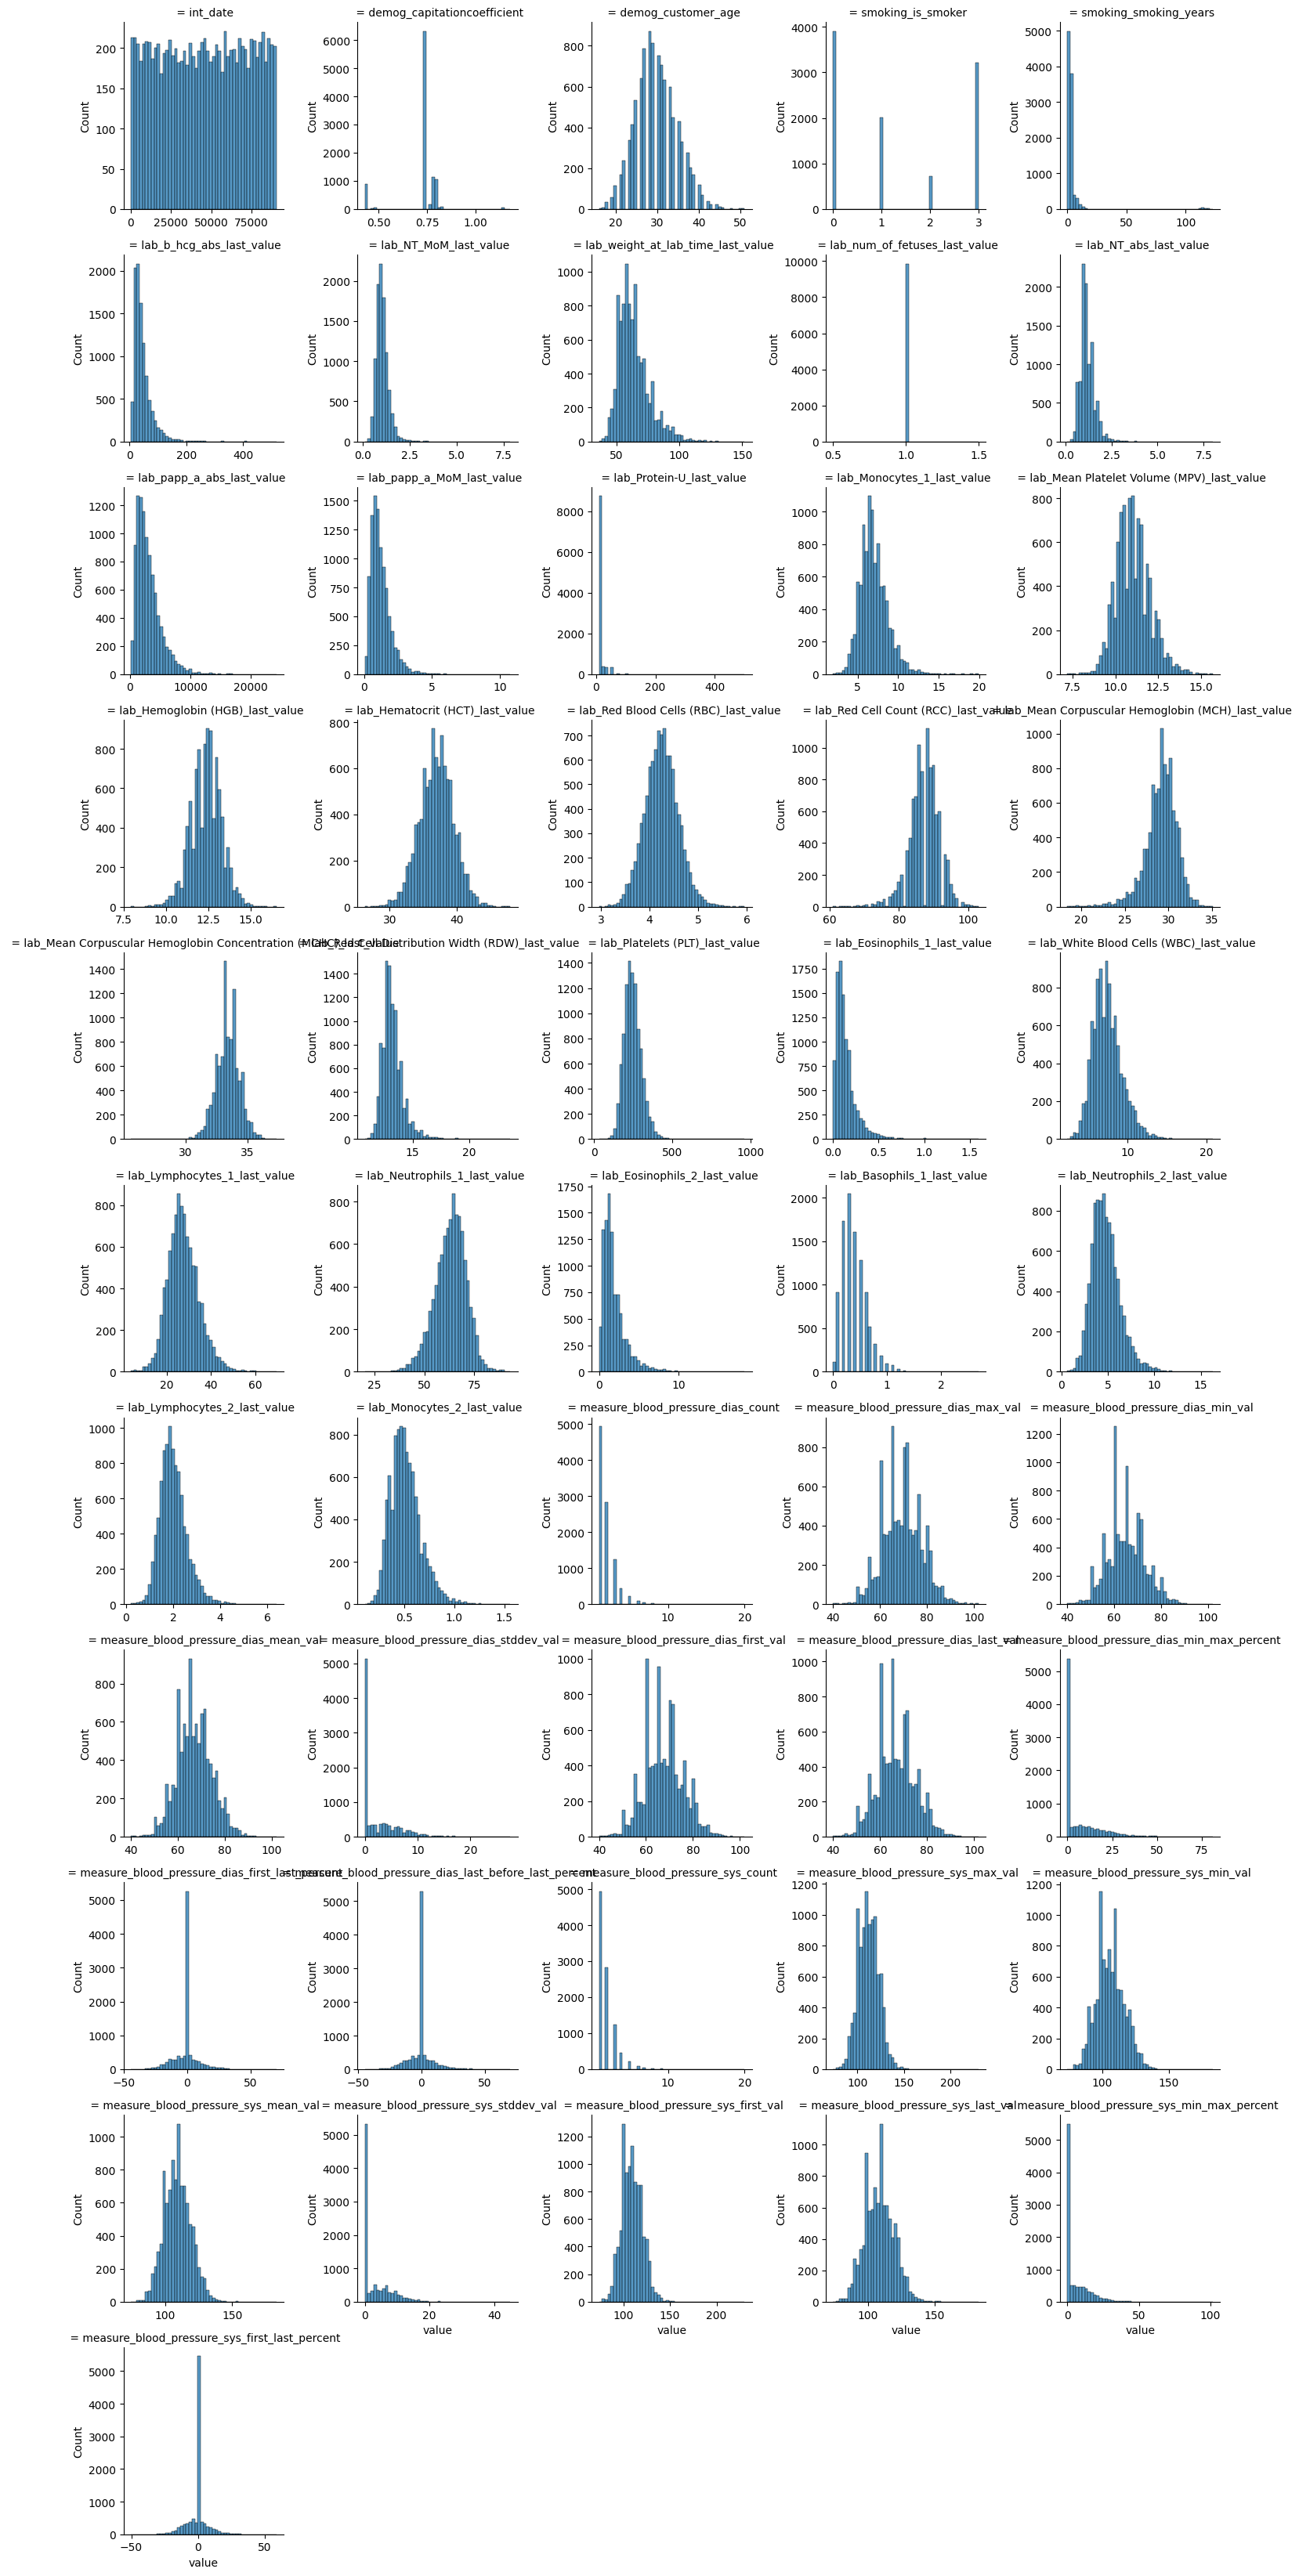

In [40]:
features = df_clean.select_dtypes(include='number').columns[:51]  # first 20 numeric features

melted = df_clean[features].melt(var_name='', value_name='value')
g = sns.FacetGrid(melted, col='', col_wrap=5, sharex=False, sharey=False)
g.map(sns.histplot, 'value', bins=50)
plt.show()

Looking at the different distributions we can see we have some features that are nicely distributed without much noise, like the labs of red blood cells or lymphocytes, but some have a few outliers, or values that make no sense.

We can also see some features are not exactly continuous (they have low decimal point resolution) based on their distribution looking slightly discreet.

Lets try and handle some of the outliers that are visible

In [41]:
# There are a few outliers with smoking years>age at pregnancy
# It is not possible and therefore they should be removed.
df_clean[df_clean.smoking_smoking_years>=df_clean.demog_customer_age]


,int_date,demog_capitationcoefficient,demog_customer_age,smoking_is_smoker,smoking_smoking_years,lab_b_hcg_abs_last_value,lab_NT_MoM_last_value,lab_weight_at_lab_time_last_value,lab_num_of_fetuses_last_value,lab_NT_abs_last_value,...,hypertensive_chronic_kidney_disease_sum,hypertensive_heart_and_chronic_kidney_disease_sum,pregnancy_hypertension_sum,preeclampsia_sum,eclampsia_sum,labs_sum,clinical_sheet,smoking_missing,lab_Protein-U_last_value_missing,measure_blood_pressure_count_is_1
104,70207,0.79,37.0,2.0,114.75,14.0,1.25,54.0,1.0,1.20,...,0,0,0,0,0,0,שבוע 8\n\nתלונות: המטופלת מדווחת על עייפות מוג...,0,0,1
111,85377,0.44,23.0,1.0,122.94,43.1,1.85,51.0,1.0,2.10,...,0,0,0,0,0,0,שבוע 8\n\nתלונות: המטופלת מתלוננת על בחילות בו...,0,1,0
222,25289,0.73,27.0,1.0,115.62,27.1,0.60,45.0,1.0,0.60,...,0,0,0,0,0,0,שבוע 8 להריון\n\nתלונות: המטופלת מתארת עייפות ...,0,0,1
396,56138,0.78,31.0,1.0,119.42,61.6,1.02,72.0,1.0,1.00,...,0,0,0,0,0,0,שבוע 8\n\nתלונות מטופלת: המטופלת מדווחת על בחי...,0,1,0
521,4345,0.78,35.0,2.0,108.14,56.8,1.46,57.0,1.0,1.40,...,0,0,0,0,0,0,שבוע 8 להריון\n\nתלונות המטופלת: המטופלת מדווח...,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9177,21267,0.78,34.0,1.0,115.12,15.6,1.28,76.0,1.0,1.80,...,0,0,0,0,0,0,שבוע 8 להריון\n\nתלונות: המטופלת מדווחת על עיי...,0,1,0
9189,89963,0.74,26.0,1.0,116.67,26.2,0.90,58.0,1.0,1.10,...,0,0,0,0,0,0,שבוע 8\n\nתלונות: המטופלת מדווחת על עייפות מוג...,0,1,0
9562,56801,0.74,29.0,1.0,119.50,409.2,1.43,43.0,1.0,1.67,...,0,0,0,0,0,0,שבוע 8 להריון\n\nתלונות: המטופלת מדווחת על עיי...,0,1,1
9826,23864,0.78,39.0,1.0,105.47,54.8,1.83,53.0,1.0,1.90,...,0,0,0,0,0,0,שבוע 8\n\nתלונות: המטופלת מתארת תחושת עייפות כ...,0,1,1


In [42]:
df_clean[df_clean.smoking_smoking_years>df_clean.demog_customer_age].Y.value_counts(normalize=True)

,proportion
Y,
0,0.956522
1,0.043478


Since we have the same target distribution for these outliers it means we can drop these rows because they are just mistakes that wont specifically contribute to the prediction

In [43]:
df_clean = df_clean[(df_clean.smoking_smoking_years<df_clean.demog_customer_age) | (df_clean.smoking_smoking_years.isna())].reset_index(drop=True)

In [44]:
df_clean.describe()

,int_date,demog_capitationcoefficient,demog_customer_age,smoking_is_smoker,smoking_smoking_years,lab_b_hcg_abs_last_value,lab_NT_MoM_last_value,lab_weight_at_lab_time_last_value,lab_num_of_fetuses_last_value,lab_NT_abs_last_value,...,hypertensive_heart_disease_sum,hypertensive_chronic_kidney_disease_sum,hypertensive_heart_and_chronic_kidney_disease_sum,pregnancy_hypertension_sum,preeclampsia_sum,eclampsia_sum,labs_sum,smoking_missing,lab_Protein-U_last_value_missing,measure_blood_pressure_count_is_1
count,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000,9725.0,9725.000000,...,9725.0,9725.0,9725.0,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000,9725.000000
mean,45352.116607,0.720925,29.705090,1.329871,2.436117,45.906242,1.042092,63.825810,1.0,1.200180,...,0.0,0.0,0.0,0.011208,0.012853,0.001645,0.004936,0.329974,0.424165,0.501388
std,26260.655972,0.099401,4.911602,1.298029,2.799733,33.322109,0.350225,12.532093,0.0,0.412046,...,0.0,0.0,0.0,0.105279,0.112648,0.040530,0.070085,0.470228,0.494241,0.500024
min,43.000000,0.430000,16.000000,0.000000,0.000000,4.300000,0.110000,36.000000,1.0,0.110000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22619.000000,0.730000,26.000000,0.000000,0.000000,24.800000,0.830000,55.000000,1.0,0.970000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45573.000000,0.740000,29.000000,1.000000,1.950000,37.100000,0.990000,61.000000,1.0,1.100000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,68264.000000,0.770000,33.000000,3.000000,4.004316,56.100000,1.200000,70.000000,1.0,1.400000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,90265.000000,1.180000,51.000000,3.000000,19.940000,516.900000,7.860000,152.000000,1.0,8.000000,...,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can also generally see that in many distributions there are some outliers that are more than a few standard deviations away from the mean (in the normally distributed features).

Although it is usually risky since we have a highly imbalanced case, for each feature we can check for the 99th quantile whether they have a different target distribution, and if not, we can remove or cap these rows.

And generally if I had longer time or the domain knowledge, I could have checked for more sanity tests in the data to see if any other features (e.g. lab tests and blood pressure) have values that don't make sense and remove them accordingly

In [45]:
def check_outliers(df, col, target='Y', q=0.99, verbose=True):
    """
    Compare target distribution in entire population vs. values above quantile threshold.

    Parameters:
    - df: pandas DataFrame
    - col: column name (feature to check)
    - target: name of the target column (binary, assumed 0/1)
    - q: quantile threshold (e.g., 0.99 for top 1%)
    - verbose: if True, prints summary; otherwise returns dictionary

    Returns:
    - Dictionary with base rate, top-q rate, and difference if verbose is False.
    """
    threshold = df[col].quantile(q)
    mask_top_q = df[col] > threshold

    base_rate = df[target].mean()
    top_q_rate = df.loc[mask_top_q, target].mean()

    result = {
        'feature': col,
        'quantile_threshold': threshold,
        'num_above_q': mask_top_q.sum(),
        'total_rows': len(df),
        'base_rate': base_rate,
        'top_q_rate': top_q_rate,
        'difference': top_q_rate - base_rate
    }

    if verbose:
        print(f"Feature: {col}")
        print(f"Quantile {q:.2f}: value > {threshold:.2f}")
        print(f"Rows above threshold: {result['num_above_q']} ({100 * result['num_above_q'] / result['total_rows']:.2f}%)")
        print(f"Base target rate: {base_rate:.4f}")
        print(f"Top {100*(1-q):.2f}% target rate: {top_q_rate:.4f}")
        print(f"Difference: {result['difference']:.4f}")
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
        return result
    else:
        return result


In [46]:
non_predictive_outliers_features = []
features = df_clean.select_dtypes(include='number').columns[1:51]
df_clean['removable'] = 0
for feature in features:
  feature_result = check_outliers(df_clean,feature)
  if feature_result['difference'] <= 0.05:
    non_predictive_outliers_features.append(feature)

for feature in non_predictive_outliers_features:
  df_clean['removable'] = (df_clean[feature] > df_clean[feature].quantile(0.99)) | (df_clean['removable'] == 1)

df_clean = df_clean[df_clean['removable'] == 0].drop(columns=['removable']).reset_index(drop=True)

Feature: demog_capitationcoefficient
Quantile 0.99: value > 0.83
Rows above threshold: 42 (0.43%)
Base target rate: 0.0434
Top 1.00% target rate: 0.2857
Difference: 0.2423
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature: demog_customer_age
Quantile 0.99: value > 42.00
Rows above threshold: 66 (0.68%)
Base target rate: 0.0434
Top 1.00% target rate: 0.2424
Difference: 0.1990
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature: smoking_is_smoker
Quantile 0.99: value > 3.00
Rows above threshold: 0 (0.00%)
Base target rate: 0.0434
Top 1.00% target rate: nan
Difference: nan
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature: smoking_smoking_years
Quantile 0.99: value > 12.30
Rows above threshold: 98 (1.01%)
Base target rate: 0.0434
Top 1.00% target rate: 0.0714
Difference: 0.0280
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature: lab_b_hcg_abs_last_value
Quantile 0.99: value > 167.04
Rows above threshold: 98 (1.01%)
Base target rate: 0.0434
Top 1.00% target rate: 0.0510
Difference: 0.0076
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature: la

In [47]:
df_clean.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7722 entries, 0 to 7721
Data columns (total 114 columns):
 #    Column                                                           Non-Null Count  Dtype  
---   ------                                                           --------------  -----  
 0    int_date                                                         7722 non-null   int64  
 1    demog_capitationcoefficient                                      7722 non-null   float64
 2    demog_customer_age                                               7722 non-null   float64
 3    smoking_is_smoker                                                7722 non-null   float64
 4    smoking_smoking_years                                            7722 non-null   float64
 5    lab_b_hcg_abs_last_value                                         7722 non-null   float64
 6    lab_NT_MoM_last_value                                            7722 non-null   float64
 7    lab_weight_at_lab_time_last_val

In [48]:
df_clean.Y.value_counts(normalize=True)

,proportion
Y,
0,0.959337
1,0.040663


In [49]:
# four_months_feat = df_clean.filter(regex='^4_').filter(regex='days_since_last_diag$').columns.tolist()
# twentyfour_months_feat = df_clean.filter(regex='^24_').filter(regex='days_since_last_diag$').columns.tolist()

In [50]:
# # we can see we dont have any features of historical diagnosis that have days that make no sense (above the timeframe)
# for feature in four_months_feat:
#   if (df_clean[feature] > 124).sum()>0:
#     print(f'{feature}: ',(df_clean[feature] > 124).sum())

# for feature in twentyfour_months_feat:
#   if (df_clean[feature] > 731).sum()>0:
#     print(f'{feature}: ',(df_clean[feature] > 731).sum())

###Single value or unique id features

The following features have only 1 constant value, and therefore are not helpful for the model. the ones that can be null when theyre not a specific value (4_diag...) already have a parralel counting feature that shows when the we have a null (when the count = 0)

So we can safely remove these following columns

In [51]:
single_value_feat = df_clean.nunique()[df_clean.nunique() == 1].index.tolist()
df_clean.drop(columns=single_value_feat,inplace=True)

We can see that the feature int date is acting as a unique id, and it can be removed.

In [52]:
df_clean.int_date.nunique(), len(df_clean)

(7722, 7722)

In [53]:
df_clean.drop(columns='int_date',inplace=True)

## Textual feature

In [54]:
print(df_clean.clinical_sheet[0])

שבוע 8

תלונות: המטופלת מתלוננת על בחילות בבוקר ועייפות מוגברת.

בדיקות: 
- משקל: 58 ק"ג
- לחץ דם: 110/70
- דופק: 80
- בדיקת שתן: שלילי לחלבון וסוכר

ממצאים: רחם מוגדל תואם לשבוע ההיריון.

מעבדה: בדיקות דם ראשוניות תקינות.

המלצות: 
- להמשיך נטילת Prenatal vitamins
- שתייה מרובה וארוחות קטנות ותכופות להקלה על בחילות

שבוע 10

תלונות: המטופלת מציינת שיפור בבחילות, אך עייפות עדיין משמעותית.

בדיקות:
- משקל: 59 ק"ג
- לחץ דם: 115/75
- דופק: 82

ממצאים: התפתחות תקינה של הרחם, נשמע דופק עוברי באמצעות Doppler.

מעבדה: 
- NIPT בוצעה והתוצאות תקינות.
  
גורמי סיכון: מטופלת מעשנת, הומלץ על הפסקת עישון.

המלצות:
- המשך מעקב לחץ דם
- יעוץ לגמילה מעישון

שבוע 12

תלונות: עייפות קלה, אין תלונות חדשות אחרות.

בדיקות:
- משקל: 60 ק"ג
- לחץ דם: 112/70
- דופק: 80

ממצאים: רחם מוגדל, דופק עוברי סדיר.

מעבדה: בדיקות סקר גנטיות - שליליות.

המלצות:
- בדיקת שקיפות עורפית (Nuchal Translucency) בשבוע הבא
- המשך פעילות גופנית קלה

שבוע 15

תלונות: תחושת חוסר נוחות באזור הבטן התחתונה.

בדיקות:
- משקל: 61 ק"ג
- לח

In [55]:
print(df_clean[df_clean.Y==1].clinical_sheet[146])

שבוע 8 להריון:

תלונות: המטופלת מתלוננת על בחילות ותחושת עייפות כללית. אין הקאות.

ממצאי בדיקה: לחץ דם 110/70 mmHg, דופק 78 לדקה, BMI של 24. הבדיקה הגופנית נמצאה תקינה.

מעבדה: תוצאות בדיקות דם שגרתיות תקינות, כולל ספירת דם ותפקודי כליות.

המלצות: לעודד צריכה קטנה ותכופה של מזון ושתייה, ולשקול נטילת תוספת של ויטמין B6 להקלה על הבחילות במידת הצורך.

שבוע 11 להריון:

תלונות: המטופלת מדווחת על כאבי ראש קלים אך נסבלים ואובדן תיאבון.

ממצאי בדיקה: לחץ דם 115/75 mmHg, דופק 80 לדקה, ללא בצקות. הבדיקה הגופנית נמצאה תקינה.

מעבדה: תוצאות בדיקות דם שגרתיות תקינות. נבדקה בדיקת PAPP-A והתקבלו רמות נמוכות במעט מהנורמה.

גורמי סיכון: ניתן לראות היסטוריה משפחתית של מחלות קרדיווסקולריות.

המלצות: מעקב קפדני אחר לחץ דם, והמלצה על הקפדה על פעילות גופנית קלה ותזונה מאוזנת.

שבוע 13 להריון:

תלונות: המטופלת מתארת תחושת חוסר נוחות קלה בבטן תחתונה, ללא כאבים חדים או דימום.

ממצאי בדיקה: לחץ דם 120/78 mmHg, דופק 82 לדקה. נצפו סימני עייפות קלה, ללא בצקות. 

מעבדה: בדיקות דם שגרתיות הראו המוגלובין נמוך מעט מהנ

In [56]:
df_clean.clinical_sheet.map(lambda x: len(x)).describe()

,clinical_sheet
count,7722.000000
mean,1360.667573
std,201.107854
min,755.000000
25%,1214.000000
50%,1343.000000
75%,1498.000000
max,2415.000000


Looking at the textual data examples above, and at the distribution of text length, it seems like texts are relatively long, and that none of the rows is empty.

#Feature Engineering

##Textual data

Generally If I had more data and much longer time I would have finetuned a transformer (probably HebBert which is trained on hebrew data) with medical reports to be able to help it with clinical data, and then do zero-shot classification to create more reliable features whether the clinical sheet is implying the patient is experiencing fatigue, if it has any risk factor like first pregnancy, history of high blood pressure, or cardiovascular problems in the family.


This is not the case, so right now my plan is as the following:

* Create a corpus of words/phrases that appear in different examples and imply of the different conditions above.
* Create Rule based features based on whether relevant words from the corpus appear in the textual data
* Use HebBert to create a CLS embedding for the text
* Use PCA to reduce the dimensionality of the embedding
* Enter the resulted embedding as additional features.

###Rule based features

In [57]:
fatigue_corpus = ['עייפות','תשישות','עייפה','תשושה','מותשת','חולשה כללית','חוסר אנרגיה']
high_blood_pressure_corpus = ['יתר לחץ דם','לחץ דם גבוה','מעקב אחר לחץ דם','מעקב אחרי לחץ דם']
nulliparity_corpus = ['היריון ראשון','הריון ראשון','ללא הריון קודם','ללא היריון קודם','ללא הריונות קודמים','בלי הריון קודם','בלי הריונות קודמים','ללא לידות']
familiy_history_corpus = ['עם הסטוריה משפחתית','עם היסטוריה משפחתית','קיימת במשפחה','עם רקע משפחתי של','קיים במשפחה','אצל האם']

In [58]:
def mentioning_corpus_words(text,corpus):
    text = text.lower()
    return int(any(keyword in text for keyword in corpus))


In [59]:
df_clean['is_fatigue'] = df_clean.clinical_sheet.map(lambda text: mentioning_corpus_words(text,fatigue_corpus))
df_clean['is_high_blood_pressure'] = df_clean.clinical_sheet.map(lambda text: mentioning_corpus_words(text,high_blood_pressure_corpus))
df_clean['is_nulliparity'] = df_clean.clinical_sheet.map(lambda text: mentioning_corpus_words(text,nulliparity_corpus))
df_clean['is_family_history'] = df_clean.clinical_sheet.map(lambda text: mentioning_corpus_words(text,familiy_history_corpus))

In [60]:
df_clean.filter(regex='^is_').describe()

,is_fatigue,is_high_blood_pressure,is_nulliparity,is_family_history
count,7722.000000,7722.000000,7722.000000,7722.000000
mean,0.997798,0.307174,0.024087,0.021368
std,0.046872,0.461352,0.153329,0.144616
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [61]:
df_clean.groupby('is_nulliparity').Y.mean()

,Y
is_nulliparity,
0,0.030918
1,0.435484


In [62]:
df_clean.groupby('is_family_history').Y.mean()

,Y
is_family_history,
0,0.039037
1,0.115152


In [63]:
df_clean.groupby('is_high_blood_pressure').Y.mean()

,Y
is_high_blood_pressure,
0,0.022804
1,0.080944


In [64]:
df_clean.groupby('is_fatigue').Y.mean()

,Y
is_fatigue,
0,0.058824
1,0.040623


###Embeddings

In [65]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained("avichr/heBERT")
model = AutoModel.from_pretrained("avichr/heBERT").to(device)
model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at avichr/heBERT and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [66]:
def get_hebrew_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    # CLS token is at position 0
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze()
    return np.stack(cls_embedding.cpu().numpy())

In [67]:
tqdm.pandas()
df_clean['cls_embedding'] = df_clean.clinical_sheet.progress_map(get_hebrew_embedding)

100%|██████████| 7722/7722 [03:16<00:00, 39.25it/s]


In [68]:
embedding_matrix = np.stack(df_clean['cls_embedding'].values)

In [69]:
pca = PCA(n_components=10)
embedding_pca_matrix = pca.fit_transform(embedding_matrix)
pca_cols = [f"emb_pca_{i}" for i in range(embedding_pca_matrix.shape[1])]
df_pca = pd.DataFrame(embedding_pca_matrix, columns=pca_cols)
df_with_emb = pd.concat([df_clean.reset_index(drop=True), df_pca], axis=1)

In [70]:
df_with_emb.drop(columns='cls_embedding',inplace=True)

## Blood pressure features

In [71]:
# df_with_emb = df_clean.copy()

In [72]:
df_with_emb['measure_blood_pressure_pulse_pressure'] = df_with_emb.measure_blood_pressure_sys_mean_val - df_with_emb.measure_blood_pressure_dias_mean_val
df_with_emb['is_bp_hypertensive'] = (df_with_emb.measure_blood_pressure_sys_mean_val > 130) | (df_with_emb.measure_blood_pressure_dias_mean_val > 80)

In [73]:
df_with_emb.groupby('is_bp_hypertensive').Y.mean()

,Y
is_bp_hypertensive,
False,0.034871
True,0.161932


In [74]:
df_with_emb.groupby('Y').measure_blood_pressure_pulse_pressure.mean()

,measure_blood_pressure_pulse_pressure
Y,
0,41.816126
1,43.390232


## Lab test features

In [75]:
df_with_emb.filter(regex='^lab_').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7722 entries, 0 to 7721
Data columns (total 27 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   lab_b_hcg_abs_last_value                                         7722 non-null   float64
 1   lab_NT_MoM_last_value                                            7722 non-null   float64
 2   lab_weight_at_lab_time_last_value                                7722 non-null   float64
 3   lab_NT_abs_last_value                                            7722 non-null   float64
 4   lab_papp_a_abs_last_value                                        7722 non-null   float64
 5   lab_papp_a_MoM_last_value                                        7722 non-null   float64
 6   lab_Protein-U_last_value                                         7722 non-null   float64
 7   lab_Monocytes_1_last_value                

In [76]:
df_with_emb['lab_Protein-U_last_value'].value_counts()

,count
lab_Protein-U_last_value,
10.0,6737
20.0,283
30.0,279
50.0,272
15.0,149
25.0,2


In [77]:
df_with_emb['is_high_proteinuria'] = (df_with_emb['lab_Protein-U_last_value'] >= 30).astype(int)
df_with_emb['is_low_papp'] = (df_with_emb['lab_papp_a_MoM_last_value'] <= 0.45).astype(int)
df_with_emb['is_high_platelets_volume'] = (df_with_emb['lab_Mean Platelet Volume (MPV)_last_value'] > 10.5).astype(int)

In [78]:
df_with_emb['lab_Mean Platelet Volume (MPV)_last_value'].describe()

,lab_Mean Platelet Volume (MPV)_last_value
count,7722.000000
mean,11.044539
std,0.930546
min,7.300000
25%,10.400000
50%,11.000000
75%,11.700000
max,13.700000


In [79]:
df_with_emb.groupby('is_high_proteinuria').Y.mean()

,Y
is_high_proteinuria,
0,0.040441
1,0.043557


In [80]:
df_with_emb.groupby('is_high_platelets_volume').Y.mean()

,Y
is_high_platelets_volume,
0,0.043029
1,0.039585


In [81]:
df_with_emb.groupby('is_low_papp').Y.mean()

,Y
is_low_papp,
0,0.038000
1,0.069984


## Diagnosis counts

It is important to know if any of the conditions is chronic in the patient and appearing more than once so to help the model I will change the diagnosis counts to be 0,1 or 2+

In [82]:
for i in range(17):
  if f'24_diag_{i}_num_of_diag' in df_with_emb.columns:
    df_with_emb[f'24_diag_{i}_num_of_diag'] = df_with_emb[f'24_diag_{i}_num_of_diag'].apply(lambda x: 2 if x > 1 else x)

for i in range(17,43):
  if f'4_diag_{i}_num_of_diag' in df_with_emb.columns:
    df_with_emb[f'4_diag_{i}_num_of_diag'] = df_with_emb[f'4_diag_{i}_num_of_diag'].apply(lambda x: 2 if x > 1 else x)

# Modeling

I have decided to use a CatBoost model because of its abilities to handle null values, categorical values and to prevent overfitting using its built-in features such as symmetrical tree splits and ordered boosting (which also prevent leakage)

Catboost should be able to manage a large dataset with many features and choose the best splits that cover biggest populations as it can.

In addition to be able to balance between the classes and try to help the model I will use the SMOTENC algorithm to try and upsample the minority class, which is more important for us to predict correctly.

## train-test split

In [104]:
ground_truth_col = ['Y','match_diag_141','match_rasham_after','match_aspirin_after','match_pdf_after','preeclampsia_sum','pregnancy_hypertension_sum','essential_hypertension_sum','labs_sum','eclampsia_sum']
X = df_with_emb.copy()
X.drop(columns = ['demog_capitationcoefficient','clinical_sheet','measure_blood_pressure_count_is_1','is_high_platelets_volume','smoking_is_smoker','lab_Basophils_1_last_value'],inplace=True)
y = df_with_emb['Y']

In [105]:
all_cats = ['lab_Protein-U_last_value_missing',
            'is_fatigue',#'measure_blood_pressure_count_is_1',
            'is_high_blood_pressure','is_nulliparity','is_family_history',
            'is_bp_hypertensive','is_high_proteinuria','is_low_papp',
            #'is_high_platelets_volume',
            ]
cat_indices = [X.drop(columns=ground_truth_col).columns.get_loc(c) for c in all_cats if c in X.columns]

In [106]:
X[all_cats] = X[all_cats].astype(int)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # preserves class ratio
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train  # preserves class ratio
)

In [108]:
X_train.drop(columns=ground_truth_col,inplace=True)

## SMOTE

In [109]:
smote = SMOTENC(categorical_features=cat_indices, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Now I will return the values i imputed before to be Null if the corresponding missingness flag after the SMOTE is 1

In [110]:
# X_train['smoking_smoking_years'] = X_train.apply(lambda row: row['smoking_smoking_years'] if row['smoking_is_smoker'] < 3 else np.nan,axis = 1)
# X_train_resampled['smoking_smoking_years'] = X_train_resampled.apply(lambda row: row['smoking_smoking_years'] if row['smoking_is_smoker'] < 3 else np.nan,axis = 1)
# X_val['smoking_smoking_years'] = X_val.apply(lambda row: row['smoking_smoking_years'] if row['smoking_is_smoker'] < 3 else np.nan,axis = 1)
# X_test['smoking_smoking_years'] = X_test.apply(lambda row: row['smoking_smoking_years'] if row['smoking_is_smoker'] < 3 else np.nan,axis = 1)

# X_train['smoking_is_smoker'] = X_train.apply(lambda row: row['smoking_is_smoker'] if row['smoking_is_smoker'] < 3 else np.nan,axis = 1)
# X_train_resampled['smoking_is_smoker'] = X_train_resampled.apply(lambda row: row['smoking_is_smoker'] if row['smoking_is_smoker'] < 3 else np.nan,axis = 1)
# X_val['smoking_is_smoker'] = X_val.apply(lambda row: row['smoking_is_smoker'] if row['smoking_is_smoker'] < 3 else np.nan,axis = 1)
# X_test['smoking_is_smoker'] = X_test.apply(lambda row: row['smoking_is_smoker'] if row['smoking_is_smoker'] < 3 else np.nan,axis = 1)


In [111]:
X_train['lab_Protein-U_last_value'] = X_train.apply(lambda row: row['lab_Protein-U_last_value'] if row['lab_Protein-U_last_value_missing'] ==0 else np.nan,axis = 1)
X_train_resampled['lab_Protein-U_last_value'] = X_train_resampled.apply(lambda row: row['lab_Protein-U_last_value'] if row['lab_Protein-U_last_value_missing'] ==0 else np.nan,axis = 1)
X_val['lab_Protein-U_last_value'] = X_val.apply(lambda row: row['lab_Protein-U_last_value'] if row['lab_Protein-U_last_value_missing'] ==0 else np.nan,axis = 1)
X_test['lab_Protein-U_last_value'] = X_test.apply(lambda row: row['lab_Protein-U_last_value'] if row['lab_Protein-U_last_value_missing'] ==0 else np.nan,axis = 1)

In [112]:
# X_train_resampled, X_val_resampled, y_train_resampled, y_val_resampled = train_test_split(
#     X_train_resampled, y_train_resampled,
#     test_size=0.2,
#     random_state=42,
#     stratify=y_train_resampled  # preserves class ratio
# )

## Model training and evaluation

In [113]:
# X_train.drop(columns='smoking_smoking_years',inplace=True)
# X_val.drop(columns='smoking_smoking_years',inplace=True)
# X_train_resampled.drop(columns='smoking_smoking_years',inplace=True)
# X_val_resampled.drop(columns='smoking_smoking_years',inplace=True)
# X_test.drop(columns='smoking_smoking_years',inplace=True)

cat_indices = [X_train_resampled.columns.get_loc(c) for c in all_cats if c in X.columns]

In [114]:
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.01,
    class_weights = [1,1],
    cat_features=all_cats,
    depth=6,
    eval_metric="PRAUC",
    loss_function="Logloss",
    l2_leaf_reg=8,
    verbose=100,
    random_seed=42
)

model.fit(X_train_resampled, y_train_resampled, eval_set=(X_val.drop(columns=ground_truth_col), y_val), early_stopping_rounds=100)

0:	learn: 0.9123817	test: 0.1547635	best: 0.1547635 (0)	total: 23.2ms	remaining: 23.2s
100:	learn: 0.9727277	test: 0.2399021	best: 0.2422572 (94)	total: 1.77s	remaining: 15.8s
200:	learn: 0.9841876	test: 0.2902504	best: 0.2971302 (181)	total: 4.62s	remaining: 18.3s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.297130154
bestIteration = 181

Shrink model to first 182 iterations.


In [115]:
y_pred = (model.predict_proba(X_train)[:,1] > 0.5).astype(int)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      4740
           1       0.30      0.68      0.41       201

    accuracy                           0.92      4941
   macro avg       0.64      0.80      0.69      4941
weighted avg       0.96      0.92      0.94      4941



In [116]:
y_pred = (model.predict_proba(X_test.drop(columns=ground_truth_col))[:,1] > 0.5).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1482
           1       0.29      0.68      0.41        63

    accuracy                           0.92      1545
   macro avg       0.64      0.81      0.68      1545
weighted avg       0.96      0.92      0.94      1545



I will check for Feature Importance based on the built-in feature of catboost:

In [117]:
feature_imp =model.get_feature_importance(prettified=True)

In [118]:
feature_imp.head(15)

,Feature Id,Importances
0,emb_pca_1,9.728372
1,measure_blood_pressure_dias_min_max_percent,8.392178
2,measure_blood_pressure_sys_count,7.983883
3,is_high_blood_pressure,7.459968
4,measure_blood_pressure_dias_stddev_val,7.093272
5,smoking_smoking_years,6.689684
6,measure_blood_pressure_dias_count,5.942485
7,smoking_missing,5.100509
8,emb_pca_0,4.421801
9,emb_pca_7,3.832937


## Ranking patients

In [119]:
probas = model.predict_proba(X_test.drop(columns=ground_truth_col))[:,1]

In [120]:
X_test = pd.concat((X_test.reset_index(),pd.Series(probas)),axis=1)

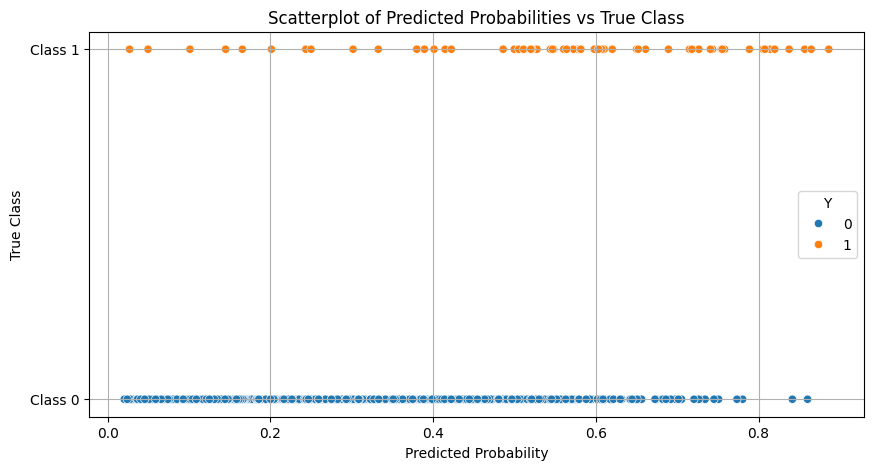

In [121]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=X_test, x=0, y='Y', hue='Y')
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel("Predicted Probability")
plt.ylabel("True Class")
plt.title("Scatterplot of Predicted Probabilities vs True Class")
plt.grid(True)
plt.show()

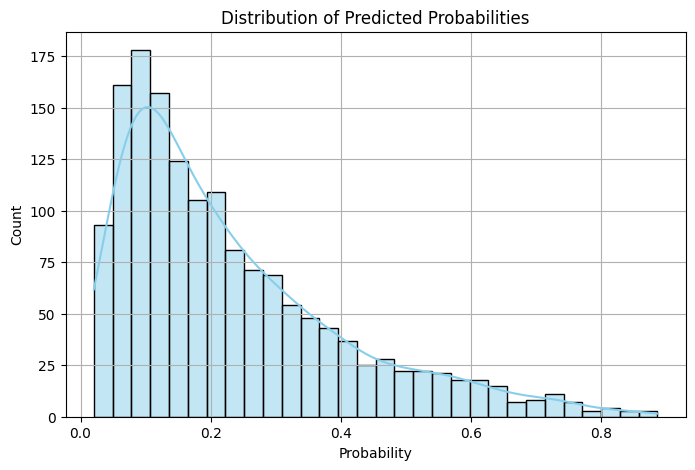

In [122]:
plt.figure(figsize=(8, 5))
sns.histplot(probas, bins=30, kde=True, color='skyblue')
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Probability")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [125]:
df_ranking = pd.concat((X_test[0],X_test['Y'],X_test.filter(regex=r'(^match|sum$)', axis=1)),axis=1)
df_ranking


,0,Y,match_diag_141,match_rasham_after,match_aspirin_after,match_pdf_after,essential_hypertension_sum,pregnancy_hypertension_sum,preeclampsia_sum,eclampsia_sum,labs_sum
0,0.118934,0,0,0,0,0,0,0,0,0,0
1,0.095196,0,0,0,0,0,0,0,0,0,0
2,0.479691,0,0,0,0,0,0,0,0,0,0
3,0.125553,0,0,0,0,0,0,0,0,0,0
4,0.243553,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1540,0.351011,0,0,0,0,0,0,0,0,0,0
1541,0.293295,0,0,0,0,0,0,0,0,0,0
1542,0.259338,0,0,0,0,0,0,0,0,0,0
1543,0.092929,0,0,0,0,0,0,0,0,0,0


In [141]:
df_ranking[df_ranking['Y']==1].groupby('eclampsia_sum')[0].mean()

,0
eclampsia_sum,
0,0.544005
1,0.649256


In [142]:
df_ranking[df_ranking['Y']==1].groupby('preeclampsia_sum')[0].mean()

,0
preeclampsia_sum,
0,0.520293
1,0.615536


In [143]:
df_ranking[df_ranking['Y']==1].groupby('pregnancy_hypertension_sum')[0].mean()

,0
pregnancy_hypertension_sum,
0,0.52216
1,0.60676


In [144]:
df_ranking[df_ranking['Y']==1].groupby('essential_hypertension_sum')[0].mean()

,0
essential_hypertension_sum,
0,0.527409
1,0.612491


In [145]:
df_ranking[df_ranking['Y']==1].groupby('labs_sum')[0].mean()

,0
labs_sum,
0,0.548128
1,0.557463


It seems that the severity of the hypertension condition is also delivered into the prediction probability.

Eclampsia has the highest mean probability (0.64)
and then essential hypertension and preeclampsia, followed by general pregnancy hypertension, and finally the lowest - from lab results.

this means that the prediction probability can help us rank the patients, and those with the highest proba have higher chances to experience more severe hypertension conditions

In [147]:
def evaluate_budget_constrained(y_true, y_pred_proba, top_percent=0.1):
    df = pd.DataFrame({'y_true': y_true, 'proba': y_pred_proba})
    df = df.sort_values('proba', ascending=False).reset_index(drop=True)

    k = int(len(df) * top_percent)
    top_k = df.iloc[:k]

    # Calculate how many true positives were captured
    recall_top_k = top_k['y_true'].sum() / df['y_true'].sum()
    precision_top_k = top_k['y_true'].mean()

    return {
        'Top_k': k,
        'Recall@Top_k': recall_top_k,
        'Precision@Top_k': precision_top_k,
        'TP@Top_k': top_k['y_true'].sum()
    }

In [150]:
result = evaluate_budget_constrained(X_test['Y'], X_test[0], top_percent=0.2)
result

{'Top_k': 309,
 'Recall@Top_k': np.float64(0.8412698412698413),
 'Precision@Top_k': np.float64(0.1715210355987055),
 'TP@Top_k': np.int64(53)}

Depending on the budget we have (percentage of patients we want to send for the test) we can see that we have a high recall, this means that the vast majority of the patients who actually experienced a hypertension condition would have been sent for the test before hand.

We still have a lot of patients who won't experience hypertension conditions that still appear in the top percentage, but this is reasonable because we have a highly imballanced dataset, and the model itself isn't doing so good in terms of precision-recall scores for the minority class (around 0.5)

# Summary

I really enjoyed the challange and the opportunity to tackle a real world problem related to the medical field, with medical data.


-

After playing with some different features, I finished the process with a model whose F1 score over the test set is around 0.4, which isnt very high, but it's also not extremely low.

-

This created some ability to identify a large percentage of the patients experiencing hypertension conditions by looking at higher prediction probabilities, and thus, can help by defining a threshold for prediction probabilities that will be meaningful, for trying to predict as best as we can who should get thoroughly tested, while maintaining a budget and reduce costs while not largely increasing the risk of misdetections.


By having a budget parameter, We can compute the quantile value of the top prediction probability and that would be our threshold for advicing to send someone for the thorough and expensive test.

-

We can look at the feature importance and see that the text written in the clinical sheet can be a benefitial indicator if a patient needs the additional tests, sadly the PCA turns the text features uninterpretable. In addition blood pressure measurements and smoking are also shown to be good indicators.


While playing with the model in previous iterations I also noticed that Platelets volume & Basophils lab results, and the demografic coefficient value can completely take control over the model (In the end I removed them to try and see if I have any improvement, but the results were very similar), which can imply that they also may be good indicators.

# Possible Extra Steps

To try and Improve the results, I could have additionally try the next steps which I didn't have time to implement:

Feature correlation - remove redundent features

feature selection - Robuta/Table1

Change amount of PCA components (lower or higher)

Use SHAP to better understand the feature importance in the model, and see what features contribute to the minority class more.


In addition I would try and automate the training and evaluation phase, using functions with the ability to change different model parameters, to more easily conduct parameter optimization over the model.

Try different models - simple baseline model (to compare improvement), Isolation forest (try and deal with a very imbalanced class almost like an anomaly detection task), and possibly even try out deep learning networks.

#Sandbox

In [ ]:
df['4_diag_94_days_since_last_diag'][~df['4_diag_94_days_since_last_diag'].isna()].describe()

In [ ]:
df['4_diag_99_num_of_diag'].value_counts()

In [ ]:
df[df.match_diag_141==1]['4_diag_133_num_of_diag'].value_counts()

In [ ]:
df.int_date.nunique()

In [ ]:
df[df.match_diag_141==1].filter(regex='^4_').describe()

In [ ]:
df.essential_hypertension_sum.value_counts()

In [ ]:
df.secondary_hypertension_sum.value_counts()

In [ ]:
df.hypertensive_chronic_kidney_disease_sum.value_counts()

In [ ]:
df.hypertensive_heart_and_chronic_kidney_disease_sum.value_counts()

In [ ]:
df.pregnancy_hypertension_sum.value_counts()

In [ ]:
df.preeclampsia_sum.value_counts()

In [ ]:
df.eclampsia_sum.value_counts()

In [ ]:
df.labs_sum.value_counts()

In [ ]:
df.match_diag_141.value_counts()

In [ ]:
df_hyp_sums = df[df.columns[141:156]]

In [ ]:
df_hyp_sums[(df_hyp_sums.match_diag_141 == 1) & (df_hyp_sums.labs_sum == 1)].sum()